<a href="https://colab.research.google.com/github/MICR-21/100-Days-of-python-code-vs/blob/main/LinearRegressionLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

1. We import Numpy for the mathematical operations like arrays, sums, etc
2. We import Matplotlib to plot graphs and visualize the results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the Dataset

Here, we define two arrays x for inputs and y for outputs which represent the data points we want to model with a straight line.

In [ ]:
x = np.array([0.5, 1, 2, 2.5, 3, 3.5, 4, 5, 5.5, 6])
y = np.array([1.5, 2, 1, 2.5, 2, 3.5, 2.5, 3, 4])

# Initializing Parameter Randomly

We set random slope (m) and intercept (c) using np.random.randn().

np.random.seed(42) ensures the same random values are gotten each time the code is run. This ensures consistency.

In [ ]:
np.random.seed(42)
m = np.random.randn()
c = np.random.randn()

# Setting Parameters

**alpha** is the learning rate that controls how big the parameter updates are at each step.

**num_iters** is the number of iterations i.e no of times the parameters will be updated.

In [ ]:
alpha = 0.01
num_iters = 1000

# Preparing Lists for Plotting

We create empty lists to record the cost (error) and parameter values (m,c) after each iteration. This helps in plotting the training progress.

In [ ]:
costs = []
m_values = []
c_values = []

# Running Gradient Descent

- **Prediction:** calculates the predicted y_pred using the current slop and intercept.
- **Cost :** computes the Mean Squared Error between the actual y and predicted y_pred. MSE is important as we are able to measure how good our model is. Small MSE means predicted line is close to real data points, large MSE means predictions are far from actual values = **bad model.**
- **dm** is the gradient (partial derivative) with respect to m.
- **dc** is the gradient with respect to c.
- We move m and c in the direction that reduces the cost
- We print every 100 iterations to monitor progress

MSE is calculated to measure how wrong our model is, and to guide gradient descent to make the model better step-by-step.

In [ ]:
costs.clear()
m_values.clear()
c_values.clear()

for i in range (num_iters):
  #predictions
  y_pred = m * x + c

  #Cost(MSE)
  cost = np.mean((y_pred - y) ** 2)

  #storing the cost and parameters in the empty arrays we had created
  costs.append(cost)
  m_values.append(m)
  c_values.append(c)

  #Gradient calculation
  dm = (2/len(x)) * np.sum((y_pred - y)* x)
  dc = (2/len(x)) * np.sum(y_pred - y)

  #Updating the parameters
  m = m - alpha * dm
  c = c - alpha * dc

  #Printing every 100 iterations
  if i % 100 == 0:
    print(f"Iteration {i}, Cost: {cost:.4f}, m: {m:.4f}, c: {c:.4f}")

Iteration 0, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 100, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 200, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 300, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 400, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 500, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 600, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 700, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 800, Cost: 0.3146, m: 0.3763, c: 1.1900
Iteration 900, Cost: 0.3146, m: 0.3763, c: 1.1900


# Final Results

After the iterations, the final values of m, c and final cost are printed. The final values will define the best-fitting straight line for the given data points.

In [ ]:
print(f"\nFinal parameters: m = {m:.4f}, c = {c:.4f}")
print(f"Final cost: {costs[-1]:.4f}")



Final parameters: m = 0.3763, c = 1.1900
Final cost: 0.3146


# Visualization

**Plot 1: Data Points and Final Regression Line**
- Scatter plot of the original data points.
- Red line showing the best-fitting line using the learned m and c.

**Plot 2: Cost Over Iterations**
- Line plot showing how the cost (error) decreases over each iteration.
- If the cost reduces smoothly, it means gradient descent is working well.

**Plot 3: Evolution of Parameters**
- Plots showing how m and c change as the model learns.
- They should stabilize as the number of iterations increases.



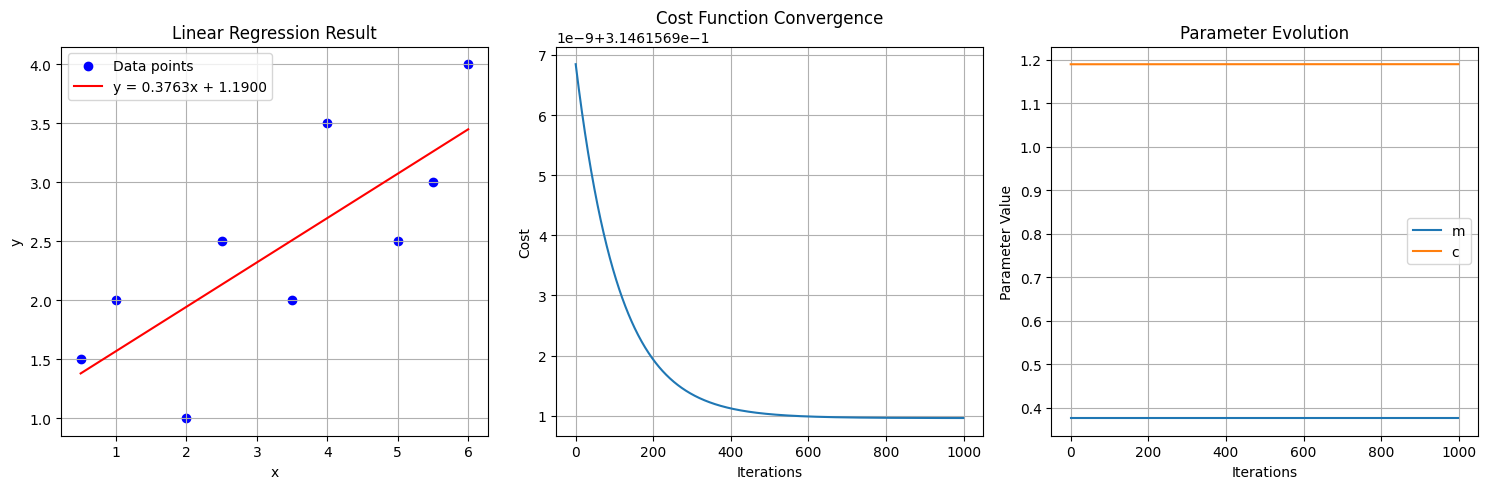

In [ ]:
plt.figure(figsize=(15,5))
# Plot 1: Data points and regression line
plt.subplot(1, 3, 1)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + c, color='red', label=f'y = {m:.4f}x + {c:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Result')
plt.legend()
plt.grid(True)

# Plot 2: Cost function over iterations
plt.subplot(1, 3, 2)
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)

# Plot 3: Parameter values over iterations
plt.subplot(1, 3, 3)
plt.plot(range(len(m_values)), m_values, label='m')
plt.plot(range(len(c_values)), c_values, label='c')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.title('Parameter Evolution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()